# Acceptable Regression Metric's Values to Evaluate ML Models
<font color='blue'>**1. Constant MSE and Increasing $R^2$  **</font>

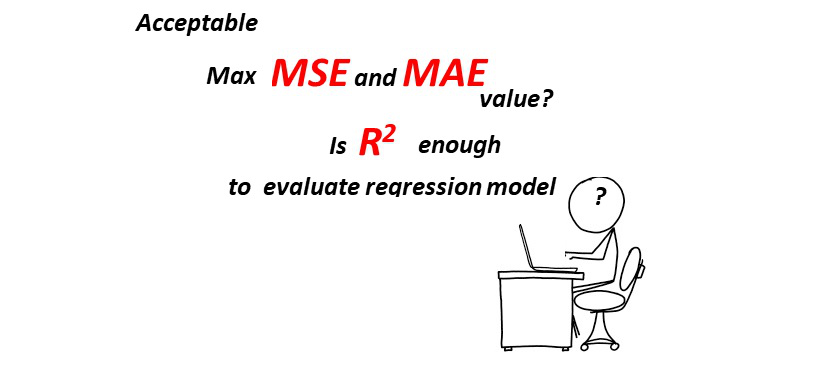

In [1]:
from PIL import Image
Image.open("MSE_R2_.jpg")

R-squared **$(R^2)$**, Mean Squared Error **(MSE)**, Mean Absolute Error **(MAE)** and Root mean squared error **(RMSE)** are the most common metrics used to measure accuracy for continuous variables.In this post we will compare **MAE** and **MSE** effect on $R^2$, and **accuracy**. We will apply the same linear regression to **4** different **data** and explain, how and why are the **MSE, MAE, $R^2$, and Accuracy** changing.First, while the MSE, and MAS will be kept fixed, the  $R^2$  and accuracy will be observed with the change of coefficient of variables. Secondly, while the $R^2$, and accuracy will be kept fixed, the MSE and MAS will be observed with the change of coefficient of variables.

In [2]:
# if the command "import torch" causes an error, use the following to install PyTorch
#!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp27-cp27mu-linux_x86_64.whl 
#!pip install torchvision
import torch

In [3]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

#import torch.utils.data

In [4]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from collections import defaultdict
from itertools import count

from pandas import Series
from sklearn import metrics

from sklearn.linear_model import lars_path, lasso_path, enet_path, LassoCV, LassoLarsCV, LassoLarsIC

from datetime import datetime
from time import time

%matplotlib inline

In [5]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 1. Constant MSE and Increasing $R^2$ 

We will create 4 diferent data (D1, D2, D3, D4) to see how $R^2$ and **Accuracy** are **changing**.
We will kept the error fixed for for D1, D2, D3 and D4, while the coefficient of variables (CoV) values will be 0.1, 0.5, 1, 10 for D1, D2, D3 and D4 respectively. 

# Data1 (D1): $Y=0.1+0.1*X_1+0.1*X_2+0.1*X_3+(Random Error)$
While the constant number and coefficient of variables (CoV) are 0.1, we will add the random error which has the coefficient of error(CoE)=0.1. We will see how $accuracy$ and $R^2$ will be affected with $CoE=0.1/CoV=0.1$ rate.

In [16]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim
rand_state = np.random.RandomState(42)
X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)
#coefficients
Coeff = np.array([0.1, 0.1, 0.1], dtype=np.float32)
const_bias = 0.1
noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]
X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
###Accuracy
for i in range(1,301):
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D1_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D1_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D1_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D1_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D1_Accuracy=(Accuracy)

# Data2 (D2): $Y=0.5+0.5*X_1+0.5*X_2+0.5*X_3+(Random Error)$
While the constant number and CoV are 0.5, and we will add the random error which has the CoE=0.1. 
Observation for the $accuracy$ and $R^2$ with affect of the $CoE=0.1/CoV=0.5$ rate.

In [17]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim
rand_state = np.random.RandomState(42)
X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# coefficients
Coeff = np.array([0.5, 0.5, 0.5], dtype=np.float32)
const_bias = 0.5

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]

X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
###Accuracy####
for i in range(1,301):
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D2_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D2_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D2_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D2_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D2_Accuracy=(Accuracy)

# Data3 (D3): $Y=1+1*X_1+1*X_2+1*X_3+(Random Error)$
While the constant number and coefficient are 1, we will add the random error which has the CoE= 0.1. How will $accuracy$ and $R^2$ be affected with $CoE=0.1/CoV=0.5$ rate?. Answer is $CoE=0.1/CoV=0.5$ rate.

In [18]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([1, 1, 1], dtype=np.float32)
const_bias = 0.1

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]

X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
#Accuracy
for i in range(1,301):
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D3_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D3_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D3_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D3_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D3_Accuracy=(Accuracy)

# Data4 (D4): $Y=10+10*X_1+10*X_2+10*X_3+(Random Error)$
While the constant number and coefficient are 10, we will add the random errorwhich has the CoE=0.1. 

In [19]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([10, 10, 10], dtype=np.float32)
const_bias = 0.1

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]

X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
#Accuracy
for i in range(1,301):
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D4_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D4_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D4_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D4_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D4_Accuracy=(Accuracy)

Now we will compare the Metrics

  Metric     D1     D2     D3     D4
0    MSE  0.011  0.011  0.011  0.011
1    MAE  0.085  0.085  0.085  0.085
2  $R^2$  0.157  0.852  0.959  1.000
3    ACR  0.706  0.933  0.943  0.994


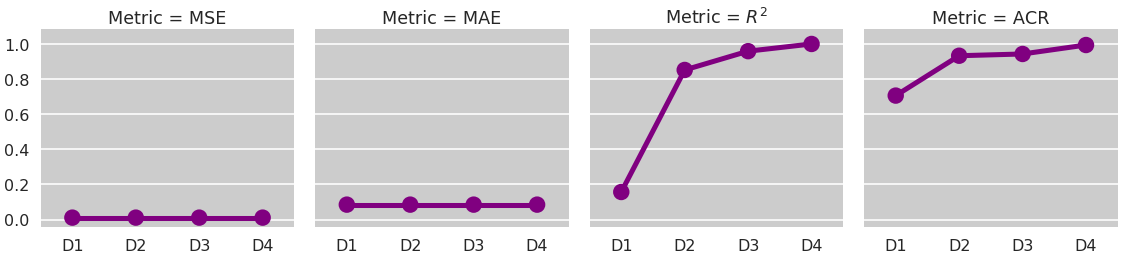

In [21]:
data = [['MSE',D1_MSE, D2_MSE, D3_MSE, D4_MSE],['MAE',D1_MAE, D2_MAE, D3_MAE, D4_MAE],
        ['$R^2$',D1_R2, D2_R2, D3_R2, D4_R2], ['ACR', D1_Accuracy, D2_Accuracy, D3_Accuracy, D4_Accuracy]]
df = pd.DataFrame(data,columns=['Metric','D1', 'D2', 'D3', 'D4'])
print (np.round(df,3))
####################
with sns.axes_style("darkgrid", {"axes.facecolor": "0.8"}):
    sns.set_context("poster")
    sns.factorplot(data=np.round(df, 3), kind="point", col="Metric", color='purple')

We kept the error fixed for for D1, D2, D3 and D4, while the CoV values are 0.1, 0.5, 1, 10 for D1, D2, D3 and D4 respectively. We have applied the 0.1/0.1 (CoE/CoV) rate for D1 and the 0.1/10 (CoE/CoV) rate for D4.
We have obtained constant MSE and MAE due to keeping fixed error rates as 0.1 for all the D1, D2, D3, and D4.
On the other hand, CoE/CoV rate is changing from 1 to 0.01 for D1 to D4. The results show that the CoE/CoV rate is directly proportional with effect on the accuracy. Due to the directly proportional effect of CoE/CoV rate, the $R^2$ and accuracy are increasing from D1 to D4.    

# 2. Constant $R^2$ and Increasing MSE  

In this part, We will again create 4 diferent data (D1, D2, D3, D4). We will apply  $\frac{CoE}{CoV}$ rate as 1 for the D1, D2, D3, D4. That is mean; The CoE and CoV values  will be 0.1, 1, 10, 100 for D1, D2, D3 and D4 respectively. 

# Data1 (D1): $Y=0.1+0.1*X_1+0.1*X_2+0.1*X_3+(Random Error)$
While the constant number and CoV values are 0.1, and random error with te CoE=0.1 will be added.

In [11]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([0.1, 0.1, 0.1], dtype=np.float32)
const_bias = 0.1

noise = 0.1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]

X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
#Accuracy
for i in range(1,301):
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D1_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D1_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D1_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D1_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D1_Accuracy=(Accuracy)

# Data2 (D2): $Y=1+1*X_1+1*X_2+1*X_3+(Random Error)$
While the constant number and CoV values are 1, we will add the random errorwhich has CoE=1.

In [12]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([1, 1, 1], dtype=np.float32)
const_bias = 1

noise = 1*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]

X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
#Accuracy
for i in range(1,301):
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D2_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D2_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D2_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D2_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D2_Accuracy=(Accuracy)

# Data3 (D3): $Y=10+10*X_1+10*X_2+10*X_3+(Random Error)$
While the constant number and CoV values are 10, we will add the random error which has the CoE=10.

In [13]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([10, 10, 10], dtype=np.float32)
const_bias = 10

noise = 10*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]

X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
#Accuracy
for i in range(1,301):
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
Accuracy=np.mean(Acr)
###############
from sklearn import metrics
D3_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D3_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D3_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D3_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D3_Accuracy=(Accuracy)

# Data4 (D4): $Y=100+100*X_1+100*X_2+100*X_3+(Random Error)$
While the constant number and CoV values are 100, we will add the random error which has the CoE=100.

In [14]:
input_dim = 3
output_dim = 1
size = 1000
total_size = size * input_dim

rand_state = np.random.RandomState(42)

X = np.array([rand_state.rand() for i in range(total_size)], dtype=np.float32)
X = X.reshape(-1, input_dim)

# feel free to experiment with other coefficients
Coeff = np.array([100, 100, 100], dtype=np.float32)
const_bias = 100

noise = 100*rand_state.normal(0,1,size)

Y = X.dot(Coeff) + const_bias + noise
Y = Y.reshape(-1, output_dim)

train_size = int(0.7*size)
X_train = X[:train_size]
X_test = X[train_size:]
Y_train = Y[:train_size]
Y_test = Y[train_size:]

X_train_with_const = sm.add_constant(X_train) 
LR1=LinearRegression().fit(X_train, Y_train)
# do the same conversion to X_test
X_test_with_const = sm.add_constant(X_test) 
Y_test_pred_1 = LR1.predict(X_test) # make the predictions by the model
Y_test=pd.DataFrame(Y_test)
Y_test_pred_1=pd.DataFrame(Y_test_pred_1)
new=pd.concat([Y_test, Y_test_pred_1], axis=1, join='inner')
new.columns = ['actual', 'Predict']
#Accuracy
for i in range(1,301):
    Acr=new.iloc[0:i,].min(axis=1)/new.iloc[0:i,].max(axis=1)
Accuracy=np.mean(Acr)
 ##############################
from sklearn import metrics
D4_MSE=(metrics.mean_squared_error(Y_test,Y_test_pred_1))
D4_MAE=(metrics.mean_absolute_error(Y_test,Y_test_pred_1))
D4_R2=(metrics.r2_score(Y_test,Y_test_pred_1))
D4_EVS=(metrics.explained_variance_score(Y_test,Y_test_pred_1))
D4_Accuracy=(Accuracy)

  Metric     D1     D2       D3         D4
0    MSE  0.011  1.062  106.240  10623.969
1    MAE  0.085  0.854    8.538     85.377
2     R2  0.157  0.157    0.157      0.157
3    ACR  0.706  0.706    0.706      0.706


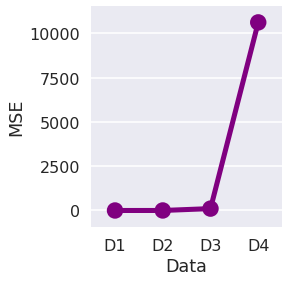

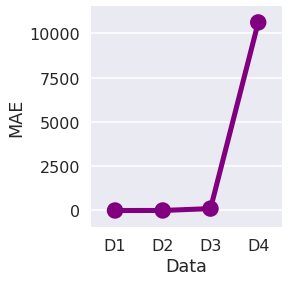

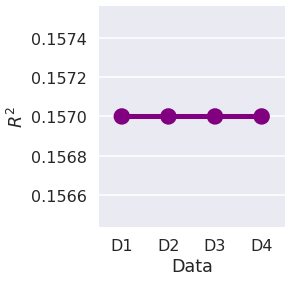

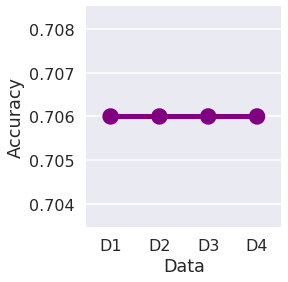

In [15]:
data = [['MSE',D1_MSE, D2_MSE, D3_MSE, D4_MSE],['MAE',D1_MAE, D2_MAE, D3_MAE, D4_MAE],
        ['R2',D1_R2, D2_R2, D3_R2, D4_R2], ['ACR', D1_Accuracy, D2_Accuracy, D3_Accuracy, D4_Accuracy]]
df = pd.DataFrame(data,columns=['Metric','D1', 'D2', 'D3', 'D4'])
print (np.round(df,3))
with sns.axes_style("darkgrid"):
    sns.set_context("poster")
    MSE=sns.factorplot(data=np.round(df.iloc[0:1, 1:5], 3), kind="point", color='purple')
    MSE.set_axis_labels("Data", "MSE")
    MAE=sns.factorplot(data=np.round(df.iloc[0:1, 1:5], 3), kind="point", color='purple')
    MAE.set_axis_labels("Data", "MAE")
    R2=sns.factorplot(data=np.round(df.iloc[2:3, 1:5], 3), kind="point", color='purple')
    R2.set_axis_labels("Data", "$R^2$")
    ACR=sns.factorplot(data=np.round(df.iloc[3:4, 1:5], 3), kind="point", color='purple')
    ACR.set_axis_labels("Data", "Accuracy")

It can be seen from figure while MSE and MAE are increasing $R^2$ and **Accuracy** are constant. We applied $\frac{CoE}{CoV}$ rate as 1 for the D1, D2, D3, and D4. While CoE values for random error were increased, the $R^2$ and **Accuracy** did **not changed**  due to **same $\frac{CoE}{CoV}=1$**  for the  D1, D2, D3, and D4.

# 3. Conclusion

A  detailed analysis for Metrics has been made to figure out acceptable maximum MSE and MAE values.The MSE and accuracy values were obtained as 0.011 and 70% by applying a linear regression model to D1. And, We also applied the same linear regression model to D4 and we have obtained MSE and accuracy 10623 and 70%, respectively.

The **analysis results** showed that, the $R^2$ and **Accuracy** values were in strong function of $\frac{CoE}{CoV}$ rate and there is no certain limitation for **MSE** to evaluate the regression models. 